Import libraries

In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from sklearn.model_selection import train_test_split

# custom modules import
#from visualization import Plotters
#from causalgraph import CausalGraph
#from cleaning import CleanDataFrame
#cleaner = CleanDataFrame()

In [2]:
#load data
data=pd.read_csv("../data/Preprocessed_data.csv")

In [3]:
data.columns

Index(['id', 'order_id', 'driver_id', 'driver_action', 'lat', 'lng', 'Trip ID',
       'Trip Origin', 'Trip Destination', 'Trip Start Time', 'Trip End Time',
       'Trip_Origin_lat', 'Trip_Origin_lng', 'Trip_Destination_lat',
       'Trip_Destination_lng', 'distance', 'day_of_month', 'weekday',
       'month_pick', 'hour_pick', 'duration', 'Holiday'],
      dtype='object')

In [4]:

columns=['order_id','lat','lng','Trip Origin', 'Trip Destination', 'Trip Start Time', 'Trip End Time']
data.drop(columns, inplace=True, axis=1)

In [5]:
data.head(5)

,id,driver_id,driver_action,Trip ID,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,distance,day_of_month,weekday,month_pick,hour_pick,duration,Holiday
0,1,243828,accepted,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,Thursday,7.0,9.0,217.0,False
1,2,243588,rejected,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,Thursday,7.0,9.0,217.0,False
2,3,243830,rejected,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,Thursday,7.0,9.0,217.0,False
3,4,243539,rejected,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,Thursday,7.0,9.0,217.0,False
4,5,171653,rejected,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,Thursday,7.0,9.0,217.0,False


In [2]:
#data.to_csv("../data/final_data.csv", index=False)
data=pd.read_csv("../data/Preprocessed_data.csv")

First, we must create an empty structure model.

In [3]:

import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

/home/sucess/anaconda3/envs/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Causal graph Sample

We can add these relationships into our structure model:

In [4]:
data=pd.read_csv("../data/Preprocessed_data.csv")

In [5]:
data.dropna(inplace = True)

In [6]:

import numpy as np

struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['driver_action', 'weekday', 'Holiday']


In [7]:
struct_data.isnull().sum()

id                      0
driver_id               0
driver_action           0
Trip ID                 0
Trip_Origin_lat         0
Trip_Origin_lng         0
Trip_Destination_lat    0
Trip_Destination_lng    0
distance                0
day_of_month            0
weekday                 0
month_pick              0
hour_pick               0
duration                0
Holiday                 0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,id,driver_id,driver_action,Trip ID,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,distance,day_of_month,weekday,month_pick,hour_pick,duration,Holiday
0,1,243828,0,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
1,2,243588,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
2,3,243830,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
3,4,243539,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
4,5,171653,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0


In [12]:
#We can now apply the NOTEARS algorithm to learn the structure.
from causalnex.structure.notears import from_pandas
sm = from_pandas(struct_data.head(5000))

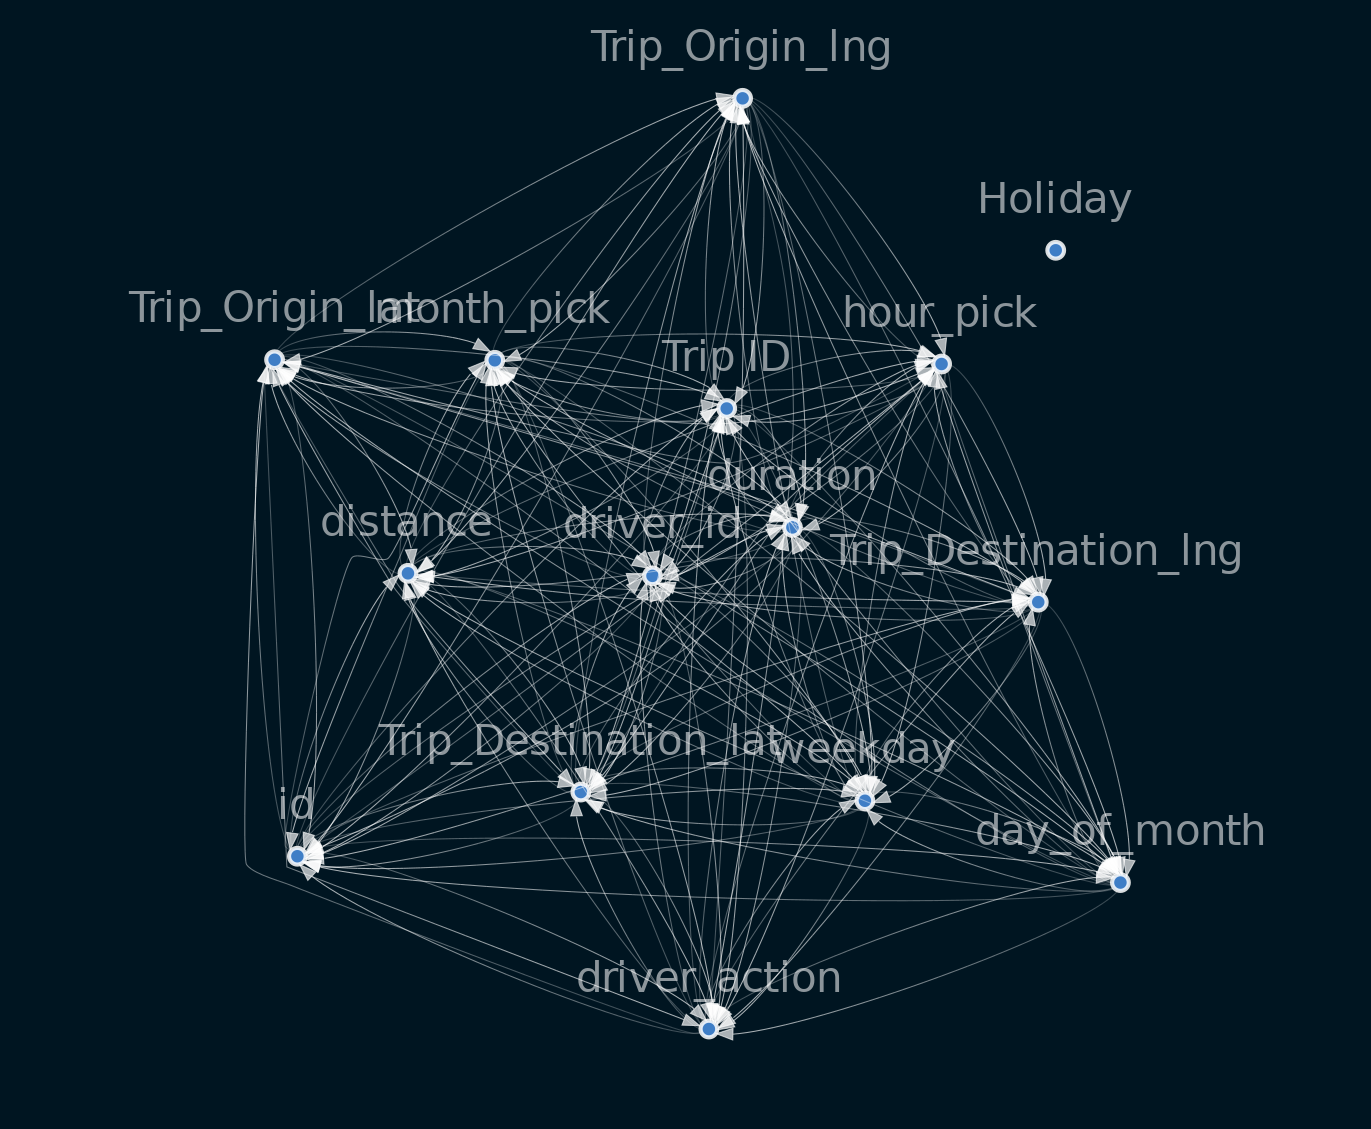

In [14]:

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.1"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

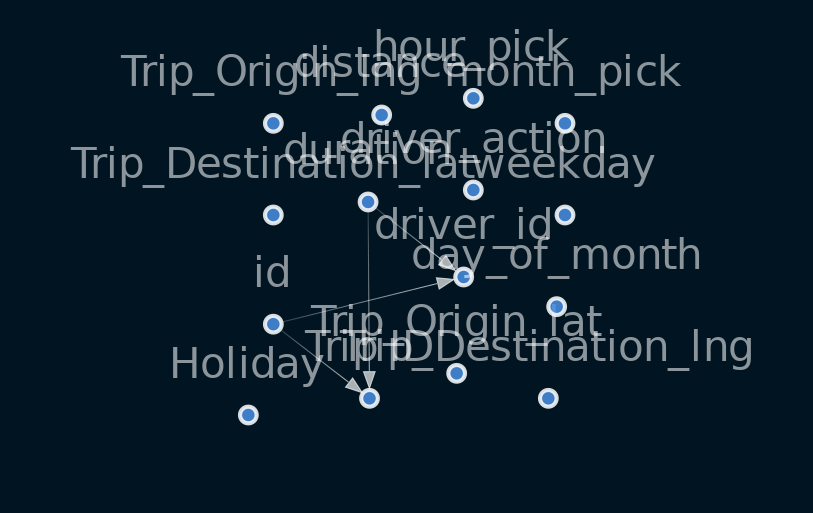

In [25]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [27]:
sm = from_pandas(struct_data, tabu_edges=[("day_of_month", "Holiday")], w_threshold=0.8)

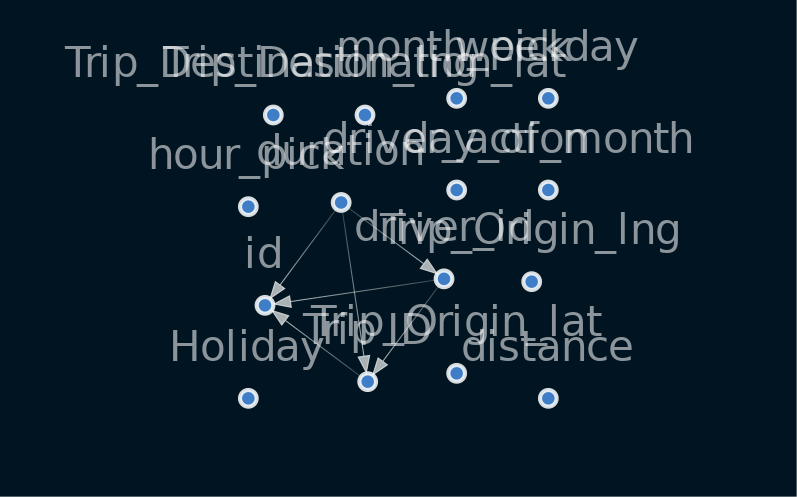

In [28]:
# changing to numeric values 
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [15]:
features = struct_data.iloc[:, 3:]
features

,Trip ID,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,distance,day_of_month,weekday,month_pick,hour_pick,duration,Holiday
0,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
2,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
3,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
4,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0,4,7.0,9.0,217.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1557735,517948,6.443374,3.552312,6.500608,3.598194,8.112927,10.0,0,9.0,11.0,6167.0,0
1557736,517948,6.443374,3.552312,6.500608,3.598194,8.112927,10.0,0,9.0,11.0,6167.0,0
1557737,517948,6.443374,3.552312,6.500608,3.598194,8.112927,10.0,0,9.0,11.0,6167.0,0
1557738,517948,6.443374,3.552312,6.500608,3.598194,8.112927,10.0,0,9.0,11.0,6167.0,0


In [31]:
from causalgraph import ScaleAndNormalize
import plots as pl
sn = ScaleAndNormalize()

In [17]:
normal_data = sn.scale_and_normalize(features, features.columns.to_list())
normal_data.insert(loc=0, column='driver_action', value=struct_data['driver_action'])
normal_data

,driver_action,Trip ID,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,distance,day_of_month,weekday,month_pick,hour_pick,duration,Holiday
0,0.0,0.00000,0.479441,0.187222,0.502968,0.194465,0.019073,0.000000,0.412405,0.463955,0.242064,0.000056,0.0
1,1.0,0.00000,0.479441,0.187222,0.502968,0.194465,0.019073,0.000000,0.412405,0.463955,0.242064,0.000056,0.0
2,1.0,0.00000,0.479441,0.187222,0.502968,0.194465,0.019073,0.000000,0.412405,0.463955,0.242064,0.000056,0.0
3,1.0,0.00000,0.479441,0.187222,0.502968,0.194465,0.019073,0.000000,0.412405,0.463955,0.242064,0.000056,0.0
4,1.0,0.00000,0.479441,0.187222,0.502968,0.194465,0.019073,0.000000,0.412405,0.463955,0.242064,0.000056,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555713,1.0,0.51215,0.385760,0.173772,0.420270,0.174906,0.006097,0.170717,0.000000,0.512150,0.244941,0.001410,0.0
1555714,1.0,0.51215,0.385760,0.173772,0.420270,0.174906,0.006097,0.170717,0.000000,0.512150,0.244941,0.001410,0.0
1555715,1.0,0.51215,0.385760,0.173772,0.420270,0.174906,0.006097,0.170717,0.000000,0.512150,0.244941,0.001410,0.0
1555716,1.0,0.51215,0.385760,0.173772,0.420270,0.174906,0.006097,0.170717,0.000000,0.512150,0.244941,0.001410,0.0


In [27]:

%%time
sm = from_pandas(normal_data.iloc[:, :13].head(5000), tabu_parent_nodes=['driver_action'],)

CPU times: user 4min 30s, sys: 4min 34s, total: 9min 5s
Wall time: 2min 57s


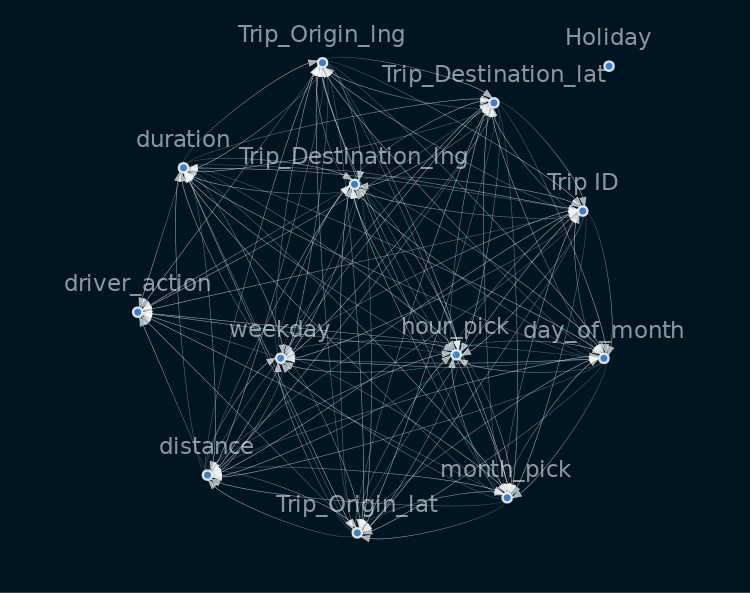

In [32]:
pl.vis_sm(sm)

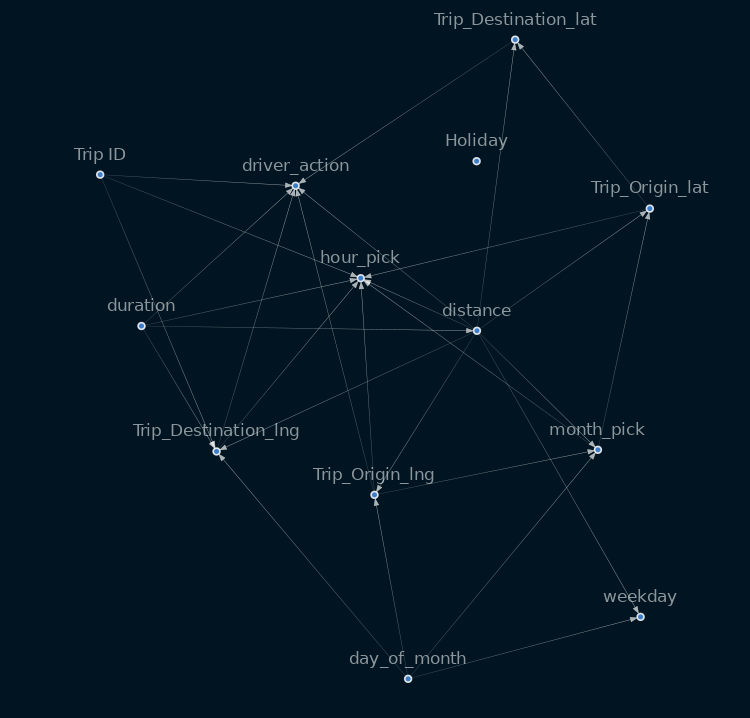

In [33]:
sm.remove_edges_below_threshold(0.8)
pl.vis_sm(sm)

causal graph

50%

In [34]:
x_selected = normal_data.iloc[:, :10]

In [35]:
portion = int(x_selected.shape[0] *.5)
x_portion = x_selected.head(portion)

CPU times: user 52.6 s, sys: 37.1 s, total: 1min 29s
Wall time: 31.1 s


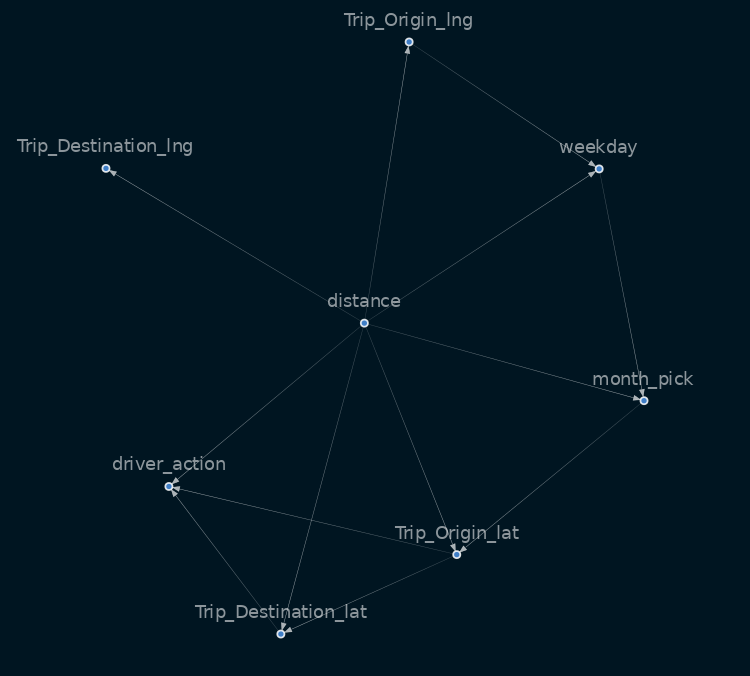

In [37]:
%%time
sm1 = from_pandas(x_portion.head(1000), tabu_parent_nodes=['driver_action'],)
sm1.remove_edges_below_threshold(0.8)
sm1 = sm1.get_largest_subgraph()
pl.vis_sm(sm1)

In [38]:
print(sm1.edges)

[('Trip_Origin_lat', 'driver_action'), ('Trip_Origin_lat', 'Trip_Destination_lat'), ('Trip_Origin_lng', 'weekday'), ('Trip_Destination_lat', 'driver_action'), ('distance', 'driver_action'), ('distance', 'Trip_Origin_lat'), ('distance', 'Trip_Origin_lng'), ('distance', 'Trip_Destination_lat'), ('distance', 'Trip_Destination_lng'), ('distance', 'weekday'), ('distance', 'month_pick'), ('weekday', 'month_pick'), ('month_pick', 'Trip_Origin_lat')]


60%

In [39]:
portion = int(x_selected.shape[0]*.6)
x_portion = x_selected.head(portion)

CPU times: user 51 s, sys: 33.7 s, total: 1min 24s
Wall time: 28.1 s


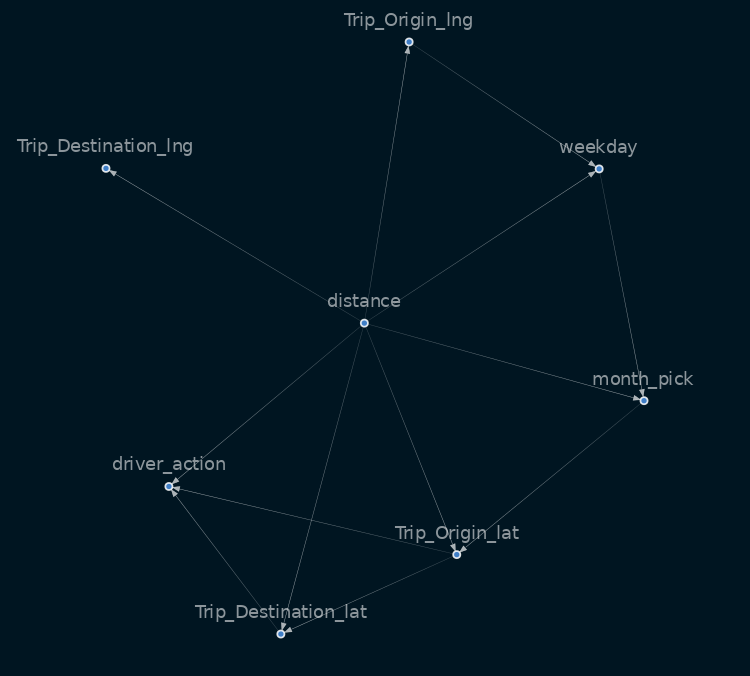

In [41]:
%%time
sm2 = from_pandas(x_portion.head(1000), tabu_parent_nodes=['driver_action'],)
sm2.remove_edges_below_threshold(0.8)
sm2 = sm2.get_largest_subgraph()
pl.vis_sm(sm2)

In [42]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)), 3)

In [43]:
jaccard_similarity(sm1.edges, sm2.edges)

1.0

70%

In [44]:
portion = int(x_selected.shape[0]*.7)
x_portion = x_selected.head(portion)

CPU times: user 53.4 s, sys: 37.2 s, total: 1min 30s
Wall time: 34.8 s


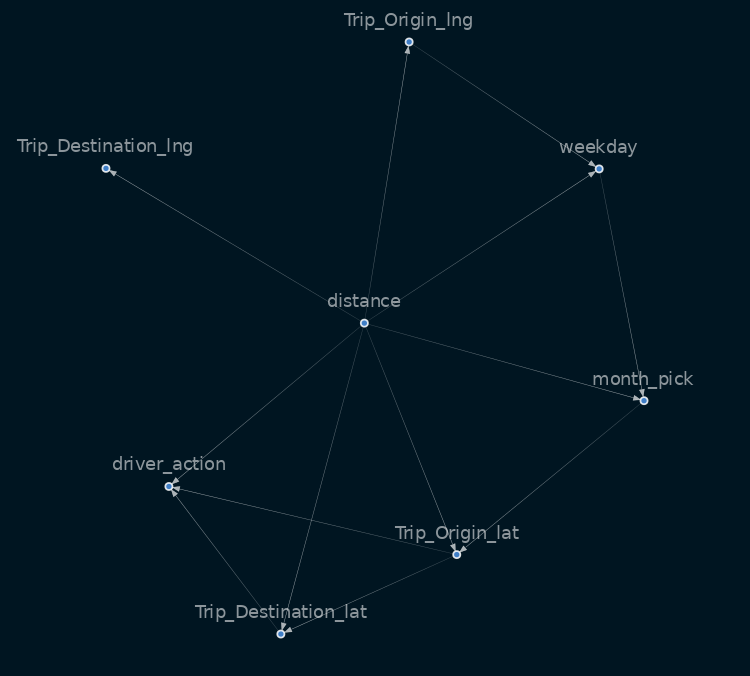

In [46]:
%%time
sm3 = from_pandas(x_portion.head(1000), tabu_parent_nodes=['driver_action'],)
sm3.remove_edges_below_threshold(0.8)
sm3 = sm3.get_largest_subgraph()
pl.vis_sm(sm3)

In [47]:
jaccard_similarity(sm2.edges, sm3.edges)

1.0

80%

In [48]:
portion = int(x_selected.shape[0] * .8)
x_portion = x_selected.head(portion)

CPU times: user 54.8 s, sys: 37.9 s, total: 1min 32s
Wall time: 32.3 s


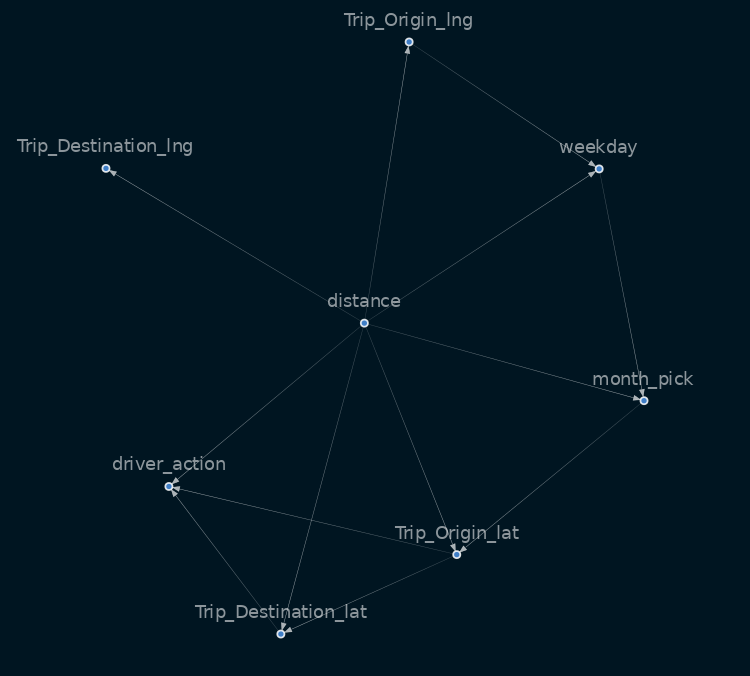

In [49]:
%%time
sm4 = from_pandas(x_portion.head(1000), tabu_parent_nodes=['driver_action'],)
sm4.remove_edges_below_threshold(0.8)
sm4 = sm4.get_largest_subgraph()
pl.vis_sm(sm4)

In [50]:
jaccard_similarity(sm3.edges, sm4.edges)

1.0

90%

In [51]:
portion = int(x_selected.shape[0] * .9)
x_portion = x_selected.head(portion)

CPU times: user 58.2 s, sys: 40.4 s, total: 1min 38s
Wall time: 33.7 s


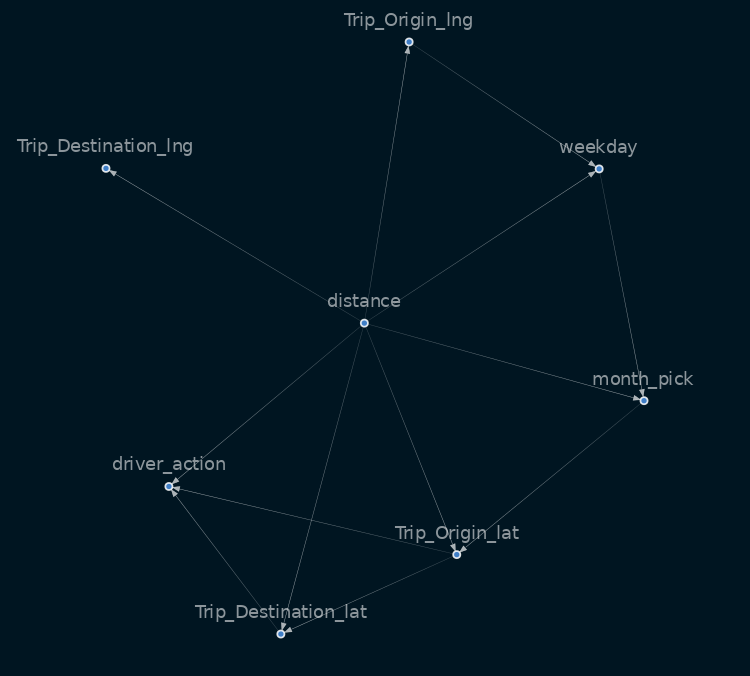

In [52]:
%%time
sm5 = from_pandas(x_portion.head(1000), tabu_parent_nodes=['driver_action'],)
sm5.remove_edges_below_threshold(0.8)
sm5 = sm5.get_largest_subgraph()
pl.vis_sm(sm5)

In [53]:
jaccard_similarity(sm5.edges, sm4.edges)

1.0

100%

CPU times: user 50.2 s, sys: 34.4 s, total: 1min 24s
Wall time: 28 s


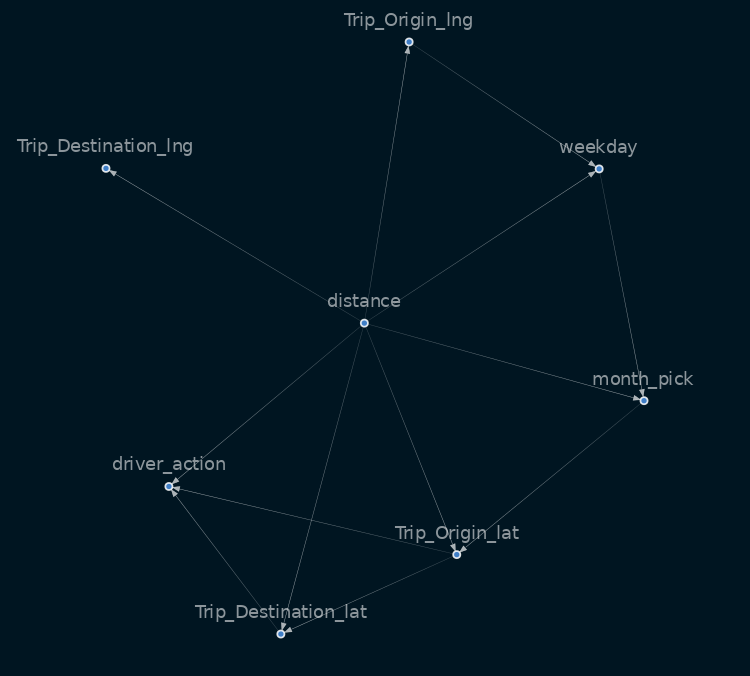

In [54]:
%%time
sm = from_pandas(x_selected.head(1000), tabu_parent_nodes=['driver_action'],)
sm.remove_edges_below_threshold(0.8)
sm = sm.get_largest_subgraph()
pl.vis_sm(sm)

In [55]:
jaccard_similarity(sm.edges, sm5.edges)

1.0

Discretising Numeric Features

In [57]:
x_selected = struct_data.iloc[:, :10]
x_selected

,id,driver_id,driver_action,Trip ID,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,distance,day_of_month
0,1,243828,0,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0
1,2,243588,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0
2,3,243830,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0
3,4,243539,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0
4,5,171653,1,392001,6.601042,3.276634,6.450107,3.391615,20.984319,1.0
...,...,...,...,...,...,...,...,...,...,...
1557735,1557736,243774,1,517948,6.443374,3.552312,6.500608,3.598194,8.112927,10.0
1557736,1557737,245447,1,517948,6.443374,3.552312,6.500608,3.598194,8.112927,10.0
1557737,1557738,239866,1,517948,6.443374,3.552312,6.500608,3.598194,8.112927,10.0
1557738,1557739,243774,1,517948,6.443374,3.552312,6.500608,3.598194,8.112927,10.0


#### Bayesian Network

In [1]:
from causalnex.network import BayesianNetwork
sm = sm.get_largest_subgraph()
bn = BayesianNetwork(sm)

/home/sucess/anaconda3/envs/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'sm' is not defined

In [ ]:
discretised_data = struct_data.copy()
discretised_data.head()

In [ ]:
for col in discretised_data.columns:
    discretised_data[col] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data[col].values)

==============//======================